In [224]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split



import matplotlib.pyplot as plt
import altair as alt
import datetime as dt

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf  # for data
from pandas_datareader import data as pdr
yf.pdr_override()

In [354]:
def read_data(stock='TSLA'):
    '''
    reading the data
    '''


    df = pdr.get_data_yahoo(stock,period = "360d",

            # fetch data by interval (including intraday if period < 60 days)
            # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            # (optional, default is '1d')
            interval = "1d",)


    return df

In [346]:
df = read_data(stock='TSLA').reset_index()

[*********************100%***********************]  1 of 1 completed


In [347]:
# first let's look at the data head
df

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2020-11-05 09:30:00-05:00,428.299988,430.350006,424.000092,429.130005,429.130005,2269593
1,2020-11-05 09:35:00-05:00,429.000000,432.500000,428.160004,432.198395,432.198395,1154462
2,2020-11-05 09:40:00-05:00,432.287811,435.230011,431.809998,432.429993,432.429993,1365249
3,2020-11-05 09:45:00-05:00,432.488800,433.779999,430.640015,432.570007,432.570007,719196
4,2020-11-05 09:50:00-05:00,432.713806,434.698700,432.611206,434.544586,434.544586,553335
5,2020-11-05 09:55:00-05:00,434.588013,437.828308,434.489990,436.589996,436.589996,1117584
6,2020-11-05 10:00:00-05:00,436.459991,440.000000,436.320099,439.499908,439.499908,1031788
7,2020-11-05 10:05:00-05:00,439.462891,439.679993,436.369995,437.404999,437.404999,754225
8,2020-11-05 10:10:00-05:00,437.440002,437.989990,434.779999,434.922302,434.922302,593257
9,2020-11-05 10:15:00-05:00,434.934998,436.170013,434.320007,435.587494,435.587494,593528


In [274]:
# here is the tail of the df which has the most recent data
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1285,2020-11-05 13:20:00-05:00,432.029999,432.049988,431.519989,432.015015,432.015015,38019
1286,2020-11-05 13:22:00-05:00,432.010010,432.290009,431.954987,432.225708,432.225708,63659
1287,2020-11-05 13:24:00-05:00,432.230011,432.250000,431.880096,432.076599,432.076599,30858
1288,2020-11-05 13:26:00-05:00,432.179993,432.190002,431.750000,431.875000,431.875000,26036
1289,2020-11-05 13:28:30-05:00,431.980011,431.980011,431.980011,431.980011,431.980011,0


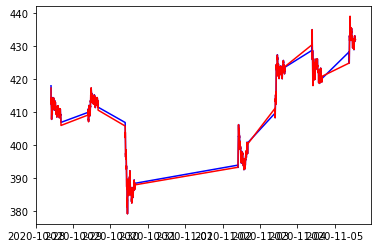

In [275]:
# quick plot to see bow open and close price are correlated

plt.plot(df['Datetime'],df['Open'],'b')
plt.plot(df['Datetime'],df['Adj Close'],'r');

### Feature Engineering:

- The idea is to create a useful set of features for the model. For stock price prediction, we are trying to predict the price of stock in the next timestep given it's current price and also the history of the prices that we have. We also have the volume that was traded at each time step. But we have to note here that we don't have the volume of the current trade but we have the volume at the previous step. So we are trying to use this lagged information as out innputs. Additionally we can create new feartures, by applying technical analysis. For example calculating the simple moving average, ballinger bands which we we will include in this analysis, macd, etc.

- First let's start with the lagged information, we will shift the high, low, and volume columns one row, which is equivelant to use the previous time steps information which is know for predicting the price. For the open price we don't need to do that because it's just the price at the start of this time step which is know. 


In [276]:
df['High'] = df['High'].shift(1)
df['Low'] = df['Low'].shift(1)
df['Volume'] = df['Volume'].shift(1)

In [277]:
# we will also convert the datetime columns to be ordinal as our model can not process datetime data

In [278]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime']=df['Datetime'].map(dt.datetime.toordinal)

In [279]:
# now we will calculate a bunch of technical indicators, sma and ballinger bands, additionally we will create two additional columns , status lower and status upper which we will serve as 
# indicators if the price crossed below the ballinger lower band or above the ballinger band
df['SMA'] = df['Adj Close'].rolling(window = 20).mean()
df['Middle Band'] =df['Adj Close'].rolling(window=20).mean()
df['Upper Band'] = df['Middle Band'] + 1.96*df['Adj Close'].rolling(window=20).std()
df['Lower Band'] = df['Middle Band'] - 1.96*df['Adj Close'].rolling(window=20).std()
df['status_lower'] = np.where(df['Adj Close'] < df['Lower Band'],'below_ballinger','normal')
df['status_upper'] = np.where(df['Adj Close'] > df['Upper Band'],'above_ballinger','normal')

In [280]:
# now we will drop na, we will have many of those due to the way SMA is calculated. Also we will drop the close column since we are only using the adj close price columns. This will be the
# the column that we are trying to predict, y. Finally we will create our X using all the columns except, adj close, low and high price

In [281]:
df = df.dropna()
df = df.drop(columns = ['Close'])
y = df['Adj Close']
X = df.drop(columns =['Adj Close','Volume' ,'Low','High'] )

In [282]:
# now let's split the data into train and test set

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle= False) 

In [284]:
# a quick look athe X_train
X_train

,Datetime,Open,SMA,Middle Band,Upper Band,Lower Band,status_lower,status_upper
19,737726,410.149994,411.393298,411.393298,415.958382,406.828215,normal,normal
20,737726,411.292603,411.046448,411.046448,414.710346,407.382550,normal,normal
21,737726,410.339996,410.990588,410.990588,414.597767,407.383410,normal,normal
22,737726,411.390015,410.815738,410.815738,414.068709,407.562767,normal,normal
23,737726,410.929993,410.609239,410.609239,413.517268,407.701210,normal,normal
...,...,...,...,...,...,...,...,...
967,737732,422.471985,422.900832,422.900832,424.561710,421.239953,normal,normal
968,737732,422.500000,422.858751,422.858751,424.522597,421.194905,normal,normal
969,737732,422.390015,422.883391,422.883391,424.567624,421.199158,normal,normal
970,737732,423.410004,422.842522,422.842522,424.415290,421.269753,normal,normal


In [ ]:
### Modeling

In [211]:
# first transformer for the numeric features
numeric_features = list(set(list(X_train.columns)) - set(['status_lower','status_upper']))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
   ])
# now a taransformer for the categorical features
categorical_features = ['status_lower','status_upper']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
# creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

ridge_model = Ridge()
# include the preprocessor and the model in one pipeline.
# Now we have a full prediction pipeline.
reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Regressor', ridge_model)])

# finally we will pass the pipe line to gridsearchcv to find the optimum paramters for the model
param_grid = {
    'Regressor__alpha':[0.1,0.25,0.4],
}
search = GridSearchCV(reg_pipeline,param_grid,cv = 5)

# fitting the model
search.fit(X_train, y_train)

# printing the first parameter
print(search.best_params_)
print("model score: %.3f" % search.score(X_test, y_test))

{'Regressor__alpha': 0.1}
model score: 0.925


In [ ]:
# let's check the prediction of the model, we are specifically interested in the last raw which has the most recent data, and we want to see the prediction of the close price for that time step

In [228]:
y_pred = search.predict(X_test)
y_pred[-1]

429.46199040624674

In [229]:
### Model Evaluation

In [230]:
from sklearn.metrics import mean_squared_error

In [231]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4387108372940598

In [232]:
# how the actual and predicted prices are correlated

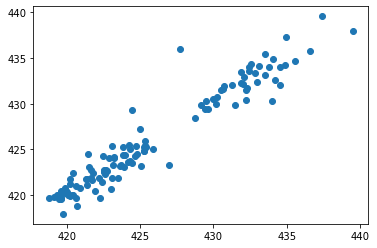

In [233]:
plt.scatter(y_test,y_pred);

In [234]:
X_test['actual'] = y_test
X_test['pred'] = y_pred

In [235]:
X_test

,Datetime,Open,Volume,SMA,Middle Band,Upper Band,Lower Band,status_lower,status_upper,actual,pred
384,737732,422.640015,322692.0,423.052052,423.052052,425.797445,420.306660,normal,normal,422.690002,422.750531
385,737732,422.690002,314357.0,423.088048,423.088048,425.735737,420.440359,normal,normal,421.619995,422.799092
386,737732,421.769989,307561.0,423.112048,423.112048,425.697796,420.526301,normal,normal,421.670013,421.881103
387,737732,421.725006,412024.0,423.278838,423.278838,425.468150,421.089525,normal,normal,423.459991,421.924252
388,737732,423.410004,397009.0,423.398587,423.398587,425.513371,421.283804,normal,normal,424.204987,423.595683
...,...,...,...,...,...,...,...,...,...,...,...
501,737734,431.500000,146640.0,432.113467,432.113467,434.892717,429.334218,normal,normal,430.519501,431.535358
502,737734,430.489197,127995.0,432.018967,432.018967,434.948326,429.089607,normal,normal,430.000000,430.509430
503,737734,429.900085,221544.0,431.912967,431.912967,434.946696,428.879238,normal,normal,430.179993,429.980789
504,737734,430.279999,147008.0,431.662971,431.662971,434.625219,428.700724,normal,normal,429.500000,430.311807


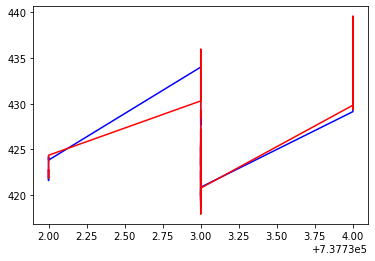

In [236]:
# finally let's plot the actual and predicted price with time
plt.plot(X_test['Datetime'],X_test['actual'],'b')
plt.plot(X_test['Datetime'],X_test['pred'],'r')

In [ ]:
# let's create a funciton to do all this steps for us

In [355]:
def test_stock(stock):
    df = read_data(stock=stock).reset_index()
    print(len(df))
    df['High'] = df['High'].shift(1)
    df['Low'] = df['Low'].shift(1)
    df['Volume'] = df['Volume'].shift(1) 
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df['Datetime']=df['Datetime'].map(dt.datetime.toordinal)
    #df['SMA_1'] = df['Adj Close'].rolling(window = 26).mean()
    #df['SMA_2'] = df['Adj Close'].rolling(window = 50).mean()
    df['Middle Band'] =df['Adj Close'].rolling(window=26).mean()
    df['Upper Band'] = df['Middle Band'] + 1.96*df['Adj Close'].rolling(window=20).std()
    df['Lower Band'] = df['Middle Band'] - 1.96*df['Adj Close'].rolling(window=20).std()
    df['status_lower'] = np.where(df['Adj Close'] < df['Lower Band'],'below_ballinger','normal')
    df['status_upper'] = np.where(df['Adj Close'] > df['Upper Band'],'above_ballinger','normal')
    df = df.dropna()
    df = df.drop(columns = ['Close'])
    y = df['Adj Close']
    X = df.drop(columns =['Adj Close','Volume' ,'Low','High'])
    X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle= False)
    print(X_train)
        # first transformer for the numeric features
    numeric_features = list(set(list(X_train.columns)) - set(['status_lower','status_upper']))
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
       ])
    # now a taransformer for the categorical features
    categorical_features = ['status_lower']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    # creating a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    ridge_model = Ridge()
    # include the preprocessor and the model in one pipeline.
    # Now we have a full prediction pipeline.
    reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('Regressor', ridge_model)])

    # finally we will pass the pipe line to gridsearchcv to find the optimum paramters for the model
    param_grid = {
        'Regressor__alpha':[0.1,0.25,0.4],
    }
    search = GridSearchCV(reg_pipeline,param_grid,cv = 5)

    # fitting the model
    search.fit(X_train, y_train)

    # printing the first parameter
    print(search.best_params_)
    print("model score: %.3f" % search.score(X_test, y_test))
    X_train = X[:-1]
    y_train = y[:-1]
    X_test = X[-1:]
    y_test = y[-1:]
    search.fit(X_train,y_train)
    y_pred = search.predict(X_train)
    print('error',np.sqrt(mean_squared_error(y_train,y_pred)))
    y_test = search.predict(X_test)
    print(y_test)
    
    


In [356]:
# let's predict he clost price for TSLA after 5 minutes
test_stock('TSLA')

[*********************100%***********************]  1 of 1 completed
360


KeyError: 'Datetime'

In [372]:
def test_stock(stock):
    df = read_data(stock=stock).reset_index()
    print(len(df))
    print(df.tail())


    df['High'] = df['High'].shift(1)
    df['Low'] = df['Low'].shift(1)
    df['Volume'] = df['Volume'].shift(1) 
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date']=df['Date'].map(dt.datetime.toordinal)
    #df['SMA_1'] = df['Adj Close'].rolling(window = 100).mean()
    #df['SMA_2'] = df['Adj Close'].rolling(window = 50).mean()
    df['Middle Band'] =df['Adj Close'].rolling(window=26).mean()
    df['Upper Band'] = df['Middle Band'] + 1.96*df['Adj Close'].rolling(window=20).std()
    df['Lower Band'] = df['Middle Band'] - 1.96*df['Adj Close'].rolling(window=20).std()
    df['status_lower'] = np.where(df['Adj Close'] < df['Lower Band'],'below_ballinger','normal')
    df['status_upper'] = np.where(df['Adj Close'] > df['Upper Band'],'above_ballinger','normal')
    df = df.dropna()
    df = df.drop(columns = ['Close'])
    y = df['Adj Close']
    X = df.drop(columns =['Adj Close','Volume' ,'Low','High'])
    X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle= False)
        # first transformer for the numeric features
    numeric_features = list(set(list(X_train.columns)) - set(['status_lower','status_upper']))
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
       ])
    # now a taransformer for the categorical features
    categorical_features = ['status_lower']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    # creating a preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    ridge_model = Ridge()
    # include the preprocessor and the model in one pipeline.
    # Now we have a full prediction pipeline.
    reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('Regressor', ridge_model)])

    # finally we will pass the pipe line to gridsearchcv to find the optimum paramters for the model
    param_grid = {
        'Regressor__alpha':[0.1,0.25,0.4],
    }
    search = GridSearchCV(reg_pipeline,param_grid,cv = 5)

    # fitting the model
    search.fit(X_train, y_train)

    # printing the first parameter
    print(search.best_params_)
    print("model score: %.3f" % search.score(X_test, y_test))
    X_train = X[:-1]
    y_train = y[:-1]
    X_test = X[-1:]
    y_test = y[-1:]
    search.fit(X_train,y_train)
    y_pred = search.predict(X_train)
    print('error',np.sqrt(mean_squared_error(y_train,y_pred)))
    y_test = search.predict(X_test)
    print(y_test)
    
    



In [373]:
# let's predict he clost price for TSLA after 5 minutes
test_stock('TSLA')

[*********************100%***********************]  1 of 1 completed
360
          Date        Open        High         Low       Close   Adj Close  \
355 2020-10-30  406.899994  407.589996  379.109985  388.040009  388.040009   
356 2020-11-02  394.000000  406.980011  392.299988  400.510010  400.510010   
357 2020-11-03  409.730011  427.769989  406.690002  423.899994  423.899994   
358 2020-11-04  430.619995  435.399994  417.100006  420.980011  420.980011   
359 2020-11-05  428.299988  440.000000  424.000092  431.050598  431.050598   

       Volume  
355  42511300  
356  29021100  
357  34351700  
358  32023000  
359  21618452  
{'Regressor__alpha': 0.1}
model score: 0.933
error 8.475095032957144
[428.14696262]
